In [32]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pandasgui import show
import matplotlib.ticker as mticker
import altair as alt
from vega_datasets import data
import json
from urllib.request import urlopen
import requests
import sqlite3
from prophet import Prophet 

# making a data frame for the csv file 
dis = pd.read_csv('DisasterDeclarationsSummaries.csv')

# For loop to change all dates so they are uniform 
date_cols = [c for c in dis.columns if 'date' in c.lower()]
for c in date_cols:
    dis[c] = pd.to_datetime(dis[c])
    
# prints the data types from the csv
print(dis.dtypes)

# prints the dates from the first 5 rows to ensure the data frame is correct  
print(dis['incidentBeginDate'].head())
# Pandas GUI used to show data from the csv file, used to show data that has many rows 
# show(dis)


femaDeclarationString                    object
disasterNumber                            int64
state                                    object
declarationType                          object
declarationDate             datetime64[ns, UTC]
fyDeclared                                int64
incidentType                             object
declarationTitle                         object
ihProgramDeclared                         int64
iaProgramDeclared                         int64
paProgramDeclared                         int64
hmProgramDeclared                         int64
incidentBeginDate           datetime64[ns, UTC]
incidentEndDate             datetime64[ns, UTC]
disasterCloseoutDate        datetime64[ns, UTC]
tribalRequest                             int64
fipsStateCode                             int64
fipsCountyCode                            int64
placeCode                                 int64
designatedArea                           object
declarationRequestNumber                

C:\Users\bekim\AppData\Local\Temp\ipykernel_24536\192550355.py:14: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  dis = pd.read_csv('DisasterDeclarationsSummaries.csv')


In [33]:
# Percentage of non-missing values from each column 
comp = dis.notnull().mean() * 100  
print("column completeness (%):")

# Excluding human-related disasters 
human_dis = ['Biological', 'Toxic Substances', 'Chemical', 'Terrorist', 'Human Cause']

# Filtering out human-related disasters
dis = dis[~dis['incidentType'].isin(human_dis)]

print(comp)

# fills in for all missing cell values regardless of data type 
dis.fillna(pd.NA)


column completeness (%):
femaDeclarationString       100.000000
disasterNumber              100.000000
state                       100.000000
declarationType             100.000000
declarationDate             100.000000
fyDeclared                  100.000000
incidentType                100.000000
declarationTitle            100.000000
ihProgramDeclared           100.000000
iaProgramDeclared           100.000000
paProgramDeclared           100.000000
hmProgramDeclared           100.000000
incidentBeginDate           100.000000
incidentEndDate              99.226578
disasterCloseoutDate         76.582100
tribalRequest               100.000000
fipsStateCode               100.000000
fipsCountyCode              100.000000
placeCode                   100.000000
designatedArea              100.000000
declarationRequestNumber    100.000000
lastIAFilingDate             28.224693
incidentId                  100.000000
region                      100.000000
designatedIncidentTypes      29.023351


femaDeclarationString  disasterNumber state declarationType  \
0                FM-5530-NV            5530    NV              FM   
1                FM-5529-OR            5529    OR              FM   
2                FM-5528-OR            5528    OR              FM   
3                FM-5527-OR            5527    OR              FM   
4                FM-5522-CA            5522    CA              FM   
...                     ...             ...   ...             ...   
67358               DR-9-TX               9    TX              DR   
67359               DR-8-IA               8    IA              DR   
67360               DR-7-MA               7    MA              DR   
67361               DR-2-TX               2    TX              DR   
67362               DR-1-GA               1    GA              DR   

                declarationDate  fyDeclared incidentType  \
0     2024-08-12 00:00:00+00:00        2024         Fire   
1     2024-08-09 00:00:00+00:00        2024         Fire   
2     2024-08-06 00:00:00+00:00        2024         Fire   
3     2024-08-02 00:00:00+00:00        2024         Fire   
4     2024-07-27 00:00:00+00:00        2024         Fire   
...                         ...         ...          ...   
67358 1953-06-19 00:00:00+00:00        1953        Flood   
67359 1953-06-11 00:00:00+00:00        1953        Flood   
67360 1953-06-11 00:00:00+00:00        1953      Tornado   
67361 1953-05-15 00:00:00+00:00        1953      Tornado   
67362 1953-05-02 00:00:00+00:00        1953      Tornado   

               declarationTitle  ihProgramDeclared  iaProgramDeclared  ...  \
0               GOLD RANCH FIRE                  0                  0  ...   
1                LEE FALLS FIRE                  0                  0  ...   
2                 ELK LANE FIRE                  0                  0  ...   
3          MILE MARKER 132 FIRE                  0                  0  ...   
4                    BOREL FIRE                  0                  0  ...   
...                         ...                ...                ...  ...   
67358                     FLOOD                  0                  1  ...   
67359                     FLOOD                  0                  1  ...   
67360                   TORNADO                  0                  1  ...   
67361  TORNADO & HEAVY RAINFALL                  0                  1  ...   
67362                   TORNADO                  0                  1  ...   

       placeCode       designatedArea declarationRequestNumber  \
0          99031      Washoe (County)                    24123   
1          99067  Washington (County)                    24122   
2          99031   Jefferson (County)                    24116   
3          99017   Deschutes (County)                    24111   
4          99029        Kern (County)                    24102   
...          ...                  ...                      ...   
67358          0            Statewide                    53010   
67359          0            Statewide                    53008   
67360          0            Statewide                    53009   
67361          0            Statewide                    53003   
67362          0            Statewide                    53013   

      lastIAFilingDate  incidentId  region  designatedIncidentTypes  \
0                  NaT  2024081201       9                        R   
1                  NaT  2024081001      10                        R   
2                  NaT  2024080701      10                        R   
3                  NaT  2024080301      10                        R   
4                  NaT  2024072701       9                        R   
...                ...         ...     ...                      ...   
67358              NaT       53010       6                     <NA>   
67359              NaT       53008       7                     <NA>   
67360              NaT       53009       1                     <NA>   
67361           

In [34]:
# prints the types of incidents from incident_type column using .unique()   
types_inc = dis['incidentType'].unique()
print(types_inc) # prints all the different types of incidents 

['Fire' 'Severe Storm' 'Straight-Line Winds' 'Flood' 'Winter Storm'
 'Hurricane' 'Tornado' 'Mud/Landslide' 'Tropical Storm' 'Snowstorm'
 'Earthquake' 'Coastal Storm' 'Other' 'Severe Ice Storm' 'Dam/Levee Break'
 'Typhoon' 'Volcanic Eruption' 'Freezing' 'Drought' 'Fishing Losses'
 'Tsunami']


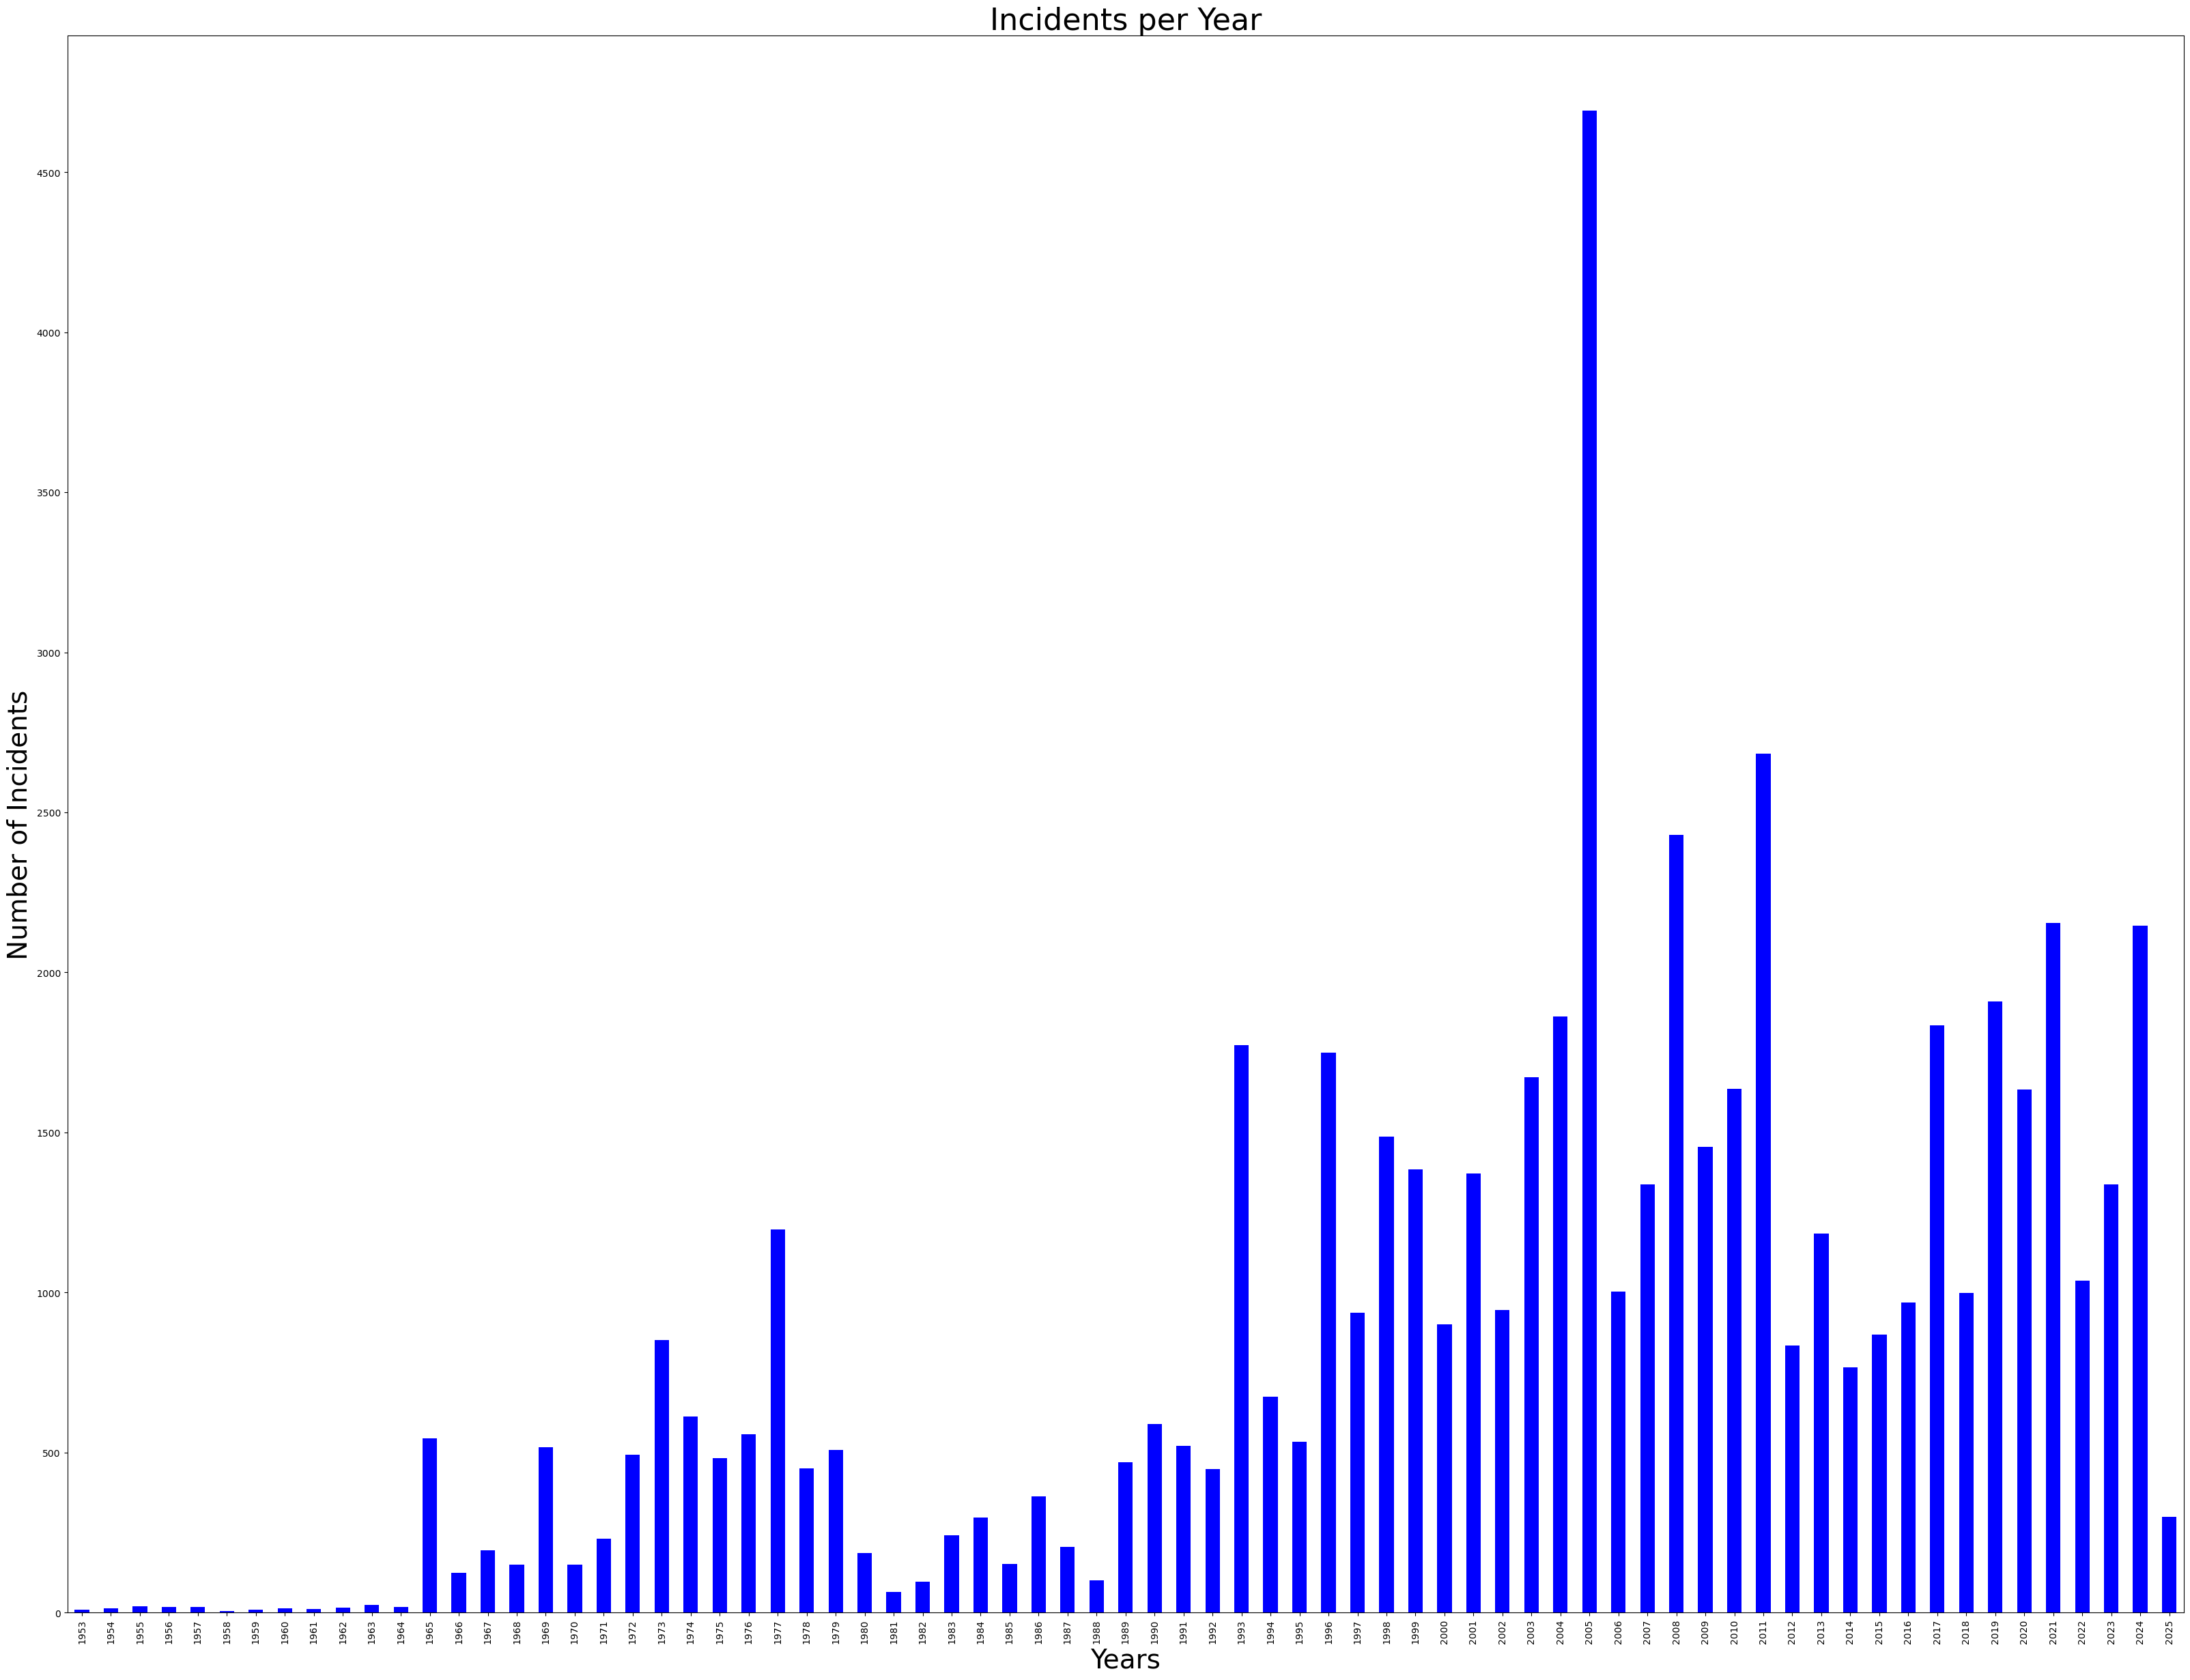

In [35]:
# grouping data, counting rows of each group and sorting the results of fy_declared
inc_year = dis.groupby('fyDeclared').size().sort_index() 
# creating the bar chart and customizing it
ax = inc_year.plot(kind='bar', figsize=(40,30), color='blue')
# increments y-axis by 500 
ax.yaxis.set_major_locator(mticker.MultipleLocator(500))
# labeling the graph 
plt.title("Incidents per Year", fontsize=32)
plt.xlabel("Years", fontsize=28)
plt.ylabel("Number of Incidents", fontsize=28)
plt.show()

In [36]:
# Vega used because it can handle alot of rows 
alt.data_transformers.enable("vegafusion")

# Creating chart 
chart = alt.Chart(dis).mark_point().encode(
    #change x axis name to Incident Start Date
    x=alt.X('incidentBeginDate:T', axis=alt.Axis(title='Start Date for Incidents', titleFontSize=32, labelFontSize=16)),
    # Change y axis name to Incident Type 
    y=alt.Y('incidentType:N', axis=alt.Axis(title='Type of Incidents', titleFontSize=32, labelFontSize=16)), 
    color='incidentType:N',
    # makes the chart interactive when hovering over points
    tooltip=['incidentBeginDate', 'incidentType', 'state']
).properties(
    width=1000,
    height=500,
    title=alt.TitleParams(text='Incident Types Over Time', fontSize=22)
)
chart.show()

alt.Chart(...)

In [37]:
# Count incidents per state
st_inc = dis.groupby('state').size().reset_index(name='count')

# Define a fixed state-to-ID mapping (including DC)
fip_map = {
    'AL': 1, 'AK': 2, 'AZ': 4, 'AR': 5, 'CA': 6, 'CO': 8, 'CT': 9, 'DE': 10, 'FL': 12, 'GA': 13,
    'HI': 15, 'ID': 16, 'IL': 17, 'IN': 18, 'IA': 19, 'KS': 20, 'KY': 21, 'LA': 22, 'ME': 23,
    'MD': 24, 'MA': 25, 'MI': 26, 'MN': 27, 'MS': 28, 'MO': 29, 'MT': 30, 'NE': 31, 'NV': 32,
    'NH': 33, 'NJ': 34, 'NM': 35, 'NY': 36, 'NC': 37, 'ND': 38, 'OH': 39, 'OK': 40, 'OR': 41,
    'PA': 42, 'RI': 44, 'SC': 45, 'SD': 46, 'TN': 47, 'TX': 48, 'UT': 49, 'VT': 50, 'VA': 51,
    'WA': 53, 'WV': 54, 'WI': 55, 'WY': 56, 'DC': 11  
}
all_st = pd.DataFrame({'state': list(fip_map.keys())})
# Fill missing states with 0 incidents
st = all_st.merge(st_inc, on='state', how='left').fillna(0)  
st['id'] = st['state'].map(fip_map)

# Load TopoJSON for US states
us_states = alt.topo_feature('https://vega.github.io/vega-datasets/data/us-10m.json', 'states')

# Create the heatmap
heatmap = alt.Chart(us_states).mark_geoshape().transform_lookup(
    lookup='id',
    from_=alt.LookupData(st, 'id', ['count', 'state'])
).encode(
    color=alt.Color('count:Q', title='Incident Count', scale=alt.Scale(scheme='reds')),
    tooltip=['state:N', 'count:Q']
).project(
    type='albersUsa'
).properties(
    width=800,
    height=500,
    title=alt.TitleParams(text='Incident Count by State Heatmap', fontSize=30)
)
heatmap.show()


alt.Chart(...)

In [38]:
#Filtering using SQL :memory: is used to create a temp database in RAM 
conn = sqlite3.connect(":memory:")

#Temporarly switching the CSV file to SQL
dis.to_sql('disas', conn, index=False, if_exists='replace')

# Code for filtering which only bring the 10 first results for Flood
qry = """
SELECT 
  state, fyDeclared, incidentType
FROM 
  disas
WHERE
  incidentType = 'Flood'
LIMIT 10
"""

# code for printing the results 
res = pd.read_sql_query(qry, conn)
print(res)

  state  fyDeclared incidentType
0    NM        2024        Flood
1    AL        1973        Flood
2    SD        2024        Flood
3    SD        2024        Flood
4    SD        2024        Flood
5    SD        2024        Flood
6    SD        2024        Flood
7    SD        2024        Flood
8    SD        2024        Flood
9    SD        2024        Flood


In [39]:
# creating a line chart to help see trends in data in altair 
dis['year'] = dis['incidentBeginDate'].dt.year

# grouping for the charts 
grp = dis.groupby(['year', 'incidentType']).size().reset_index(name='count')

zoom = alt.selection_interval(bind='scales')

chart_line = alt.Chart(grp).mark_line().encode(
    # years will be on x-axis treats years as ordinal data 
    x=alt.X('year:O', title='Year', axis=alt.Axis(titleFontSize=32, labelFontSize=16)),  
    
    # number of incidents will be on the y-axis treats count as quantitative data  
    y=alt.Y('count:Q', title='Number of Incidents', axis=alt.Axis(titleFontSize=32, labelFontSize=16)),  
    
    # color for each incident N for nominal data and 20 distinct colors
    color=alt.Color('incidentType:N', scale=alt.Scale(scheme='category20')),       
    
    # tooltip to help better read data 
    tooltip=['year', 'count', 'incidentType'] 
).properties(
    width=1000,
    height=800,
    title=alt.TitleParams(text='Incident Types Over Time', fontSize=32)
)
chart_line.show()

alt.Chart(...)

In [40]:
# grouping up similar disasters
cat_map = {
    'Storm': ['Severe Storm', 'Straight-Line Winds', 'Winter Storm', 'Hurricane', 
              'Tropical Storm', 'Snowstorm', 'Coastal Storm', 'Severe Ice Storm', 'Typhoon'],
    'Geo': ['Earthquake', 'Mud/Landslide', 'Volcanic Eruption', 'Tsunami'],
    'Fire': ['Fire'],
    'Flood': ['Flood', 'Dam/Levee Break'],
    'Extreme': ['Freezing', 'Drought'],
    'Other': ['Other', 'Fishing Losses']
}

# Function used to map disasters into categories 
def map_cat(inc):
    # loop through categories 
    for cat, lst in cat_map.items():
        # if the incident is in that type return category 
        if inc in lst:
            return cat
    return 'Unknown'

In [41]:
# Applying the function 
dis['cat'] = dis['incidentType'].apply(map_cat)

# Count disasters per year
fc_data = dis.groupby('year').size().reset_index(name='y')

# Renaming the column because of facebook prophet requirements 
fc_data.rename(columns={'year': 'ds'}, inplace=True)

# Convert ds to date time format 
fc_data['ds'] = pd.to_datetime(fc_data['ds'], format='%Y')

# Initialize the Prophet model, takes into account yearly seasonality not daily or weekly 
mod = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)

# Fit the model with historical data
mod.fit(fc_data)

16:29:25 - cmdstanpy - INFO - Chain [1] start processing
16:29:25 - cmdstanpy - INFO - Chain [1] done processing


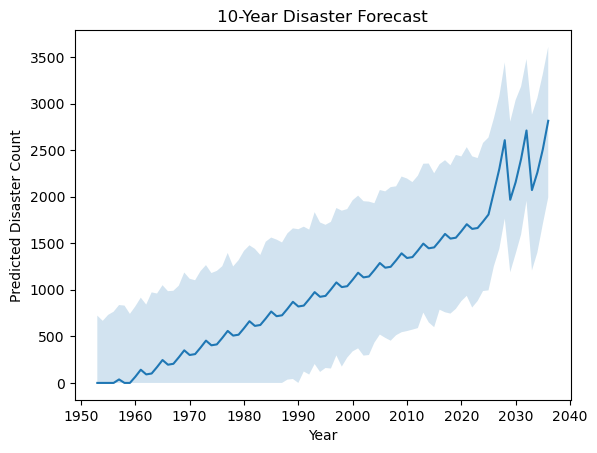

In [42]:
# Generate future dates 
last = fc_data['ds'].dt.year.max()
fut = mod.make_future_dataframe(periods=(2035 - last) + 1, freq='YE')

# Predict disaster occurrences
fc = mod.predict(fut)

# setting boundaries so that graphs do not go below 0 
fc['yhat'] = fc['yhat'].clip(lower=0)
fc['yhat_lower'] = fc['yhat_lower'].clip(lower=0)
fc['yhat_upper'] = fc['yhat_upper'].clip(lower=0)

# get forecasted values for 2035 
pred_2035 = fc[fc['ds'].dt.year == 2035]

# Plot forecast
plt.plot(fc['ds'], fc['yhat'], label='Forecast')
plt.fill_between(fc['ds'], fc['yhat_lower'], fc['yhat_upper'], alpha=0.2)
plt.title('10-Year Disaster Forecast')
plt.xlabel('Year')
plt.ylabel('Predicted Disaster Count')
plt.show()

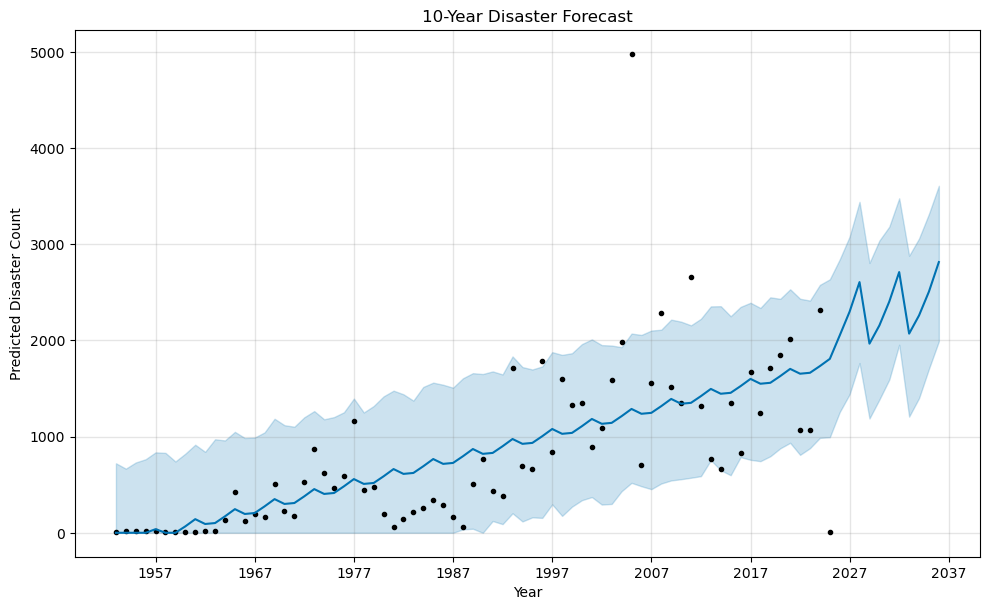

In [43]:
# Plot forecast
fig = mod.plot(fc)
plt.title('10-Year Disaster Forecast')
plt.xlabel('Year')
plt.ylabel('Predicted Disaster Count')
plt.show()

16:29:26 - cmdstanpy - INFO - Chain [1] start processing
16:29:26 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\bekim\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


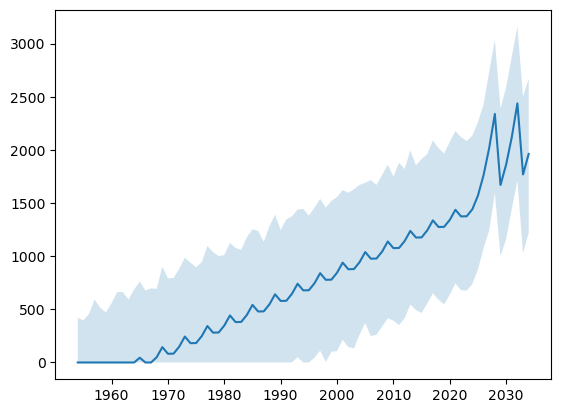

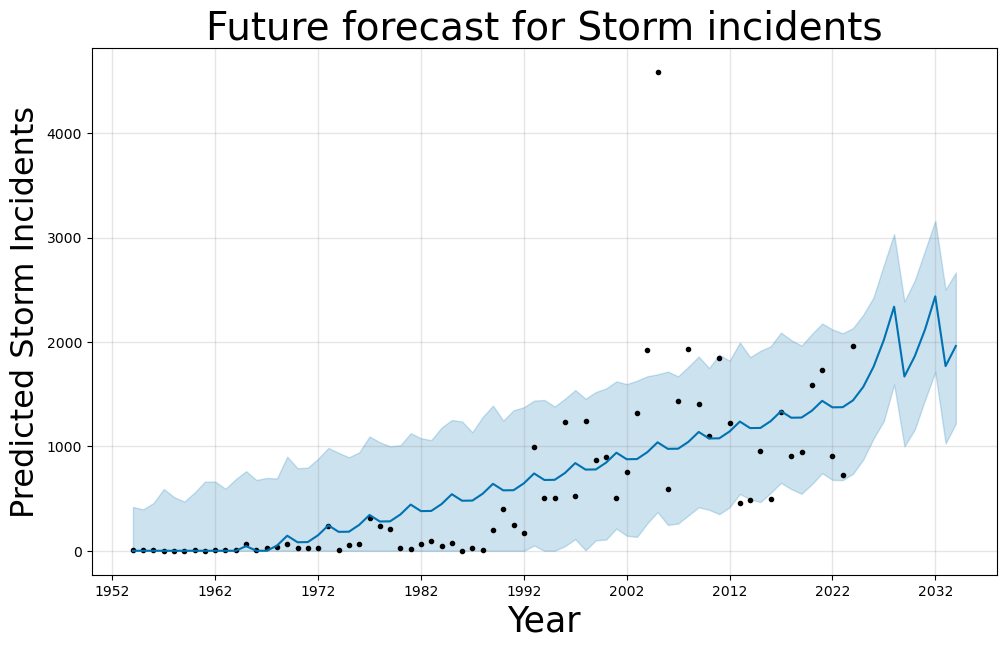

16:29:26 - cmdstanpy - INFO - Chain [1] start processing
16:29:26 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\bekim\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


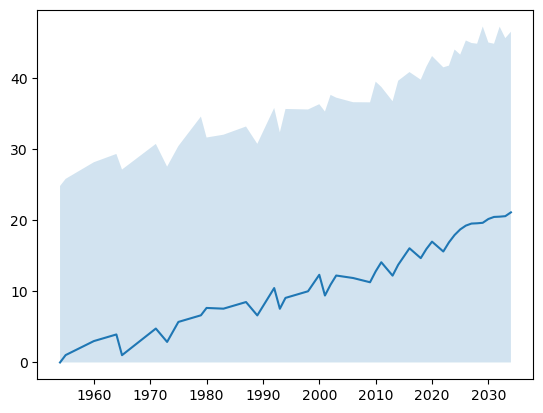

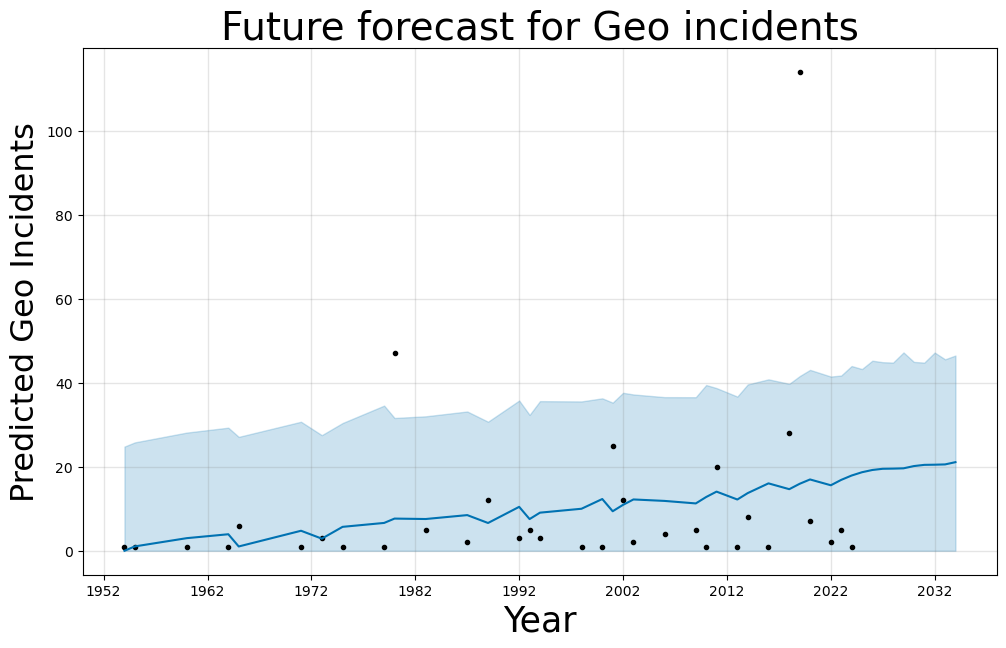

16:29:27 - cmdstanpy - INFO - Chain [1] start processing
16:29:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\bekim\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


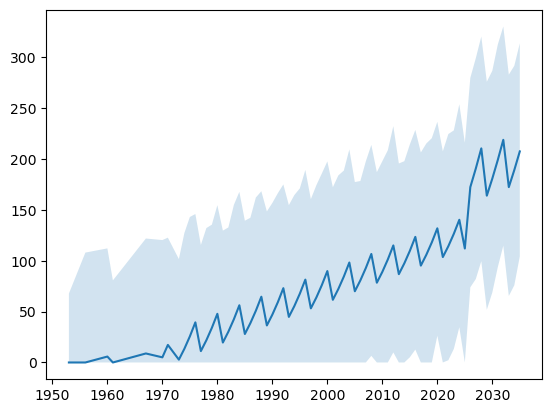

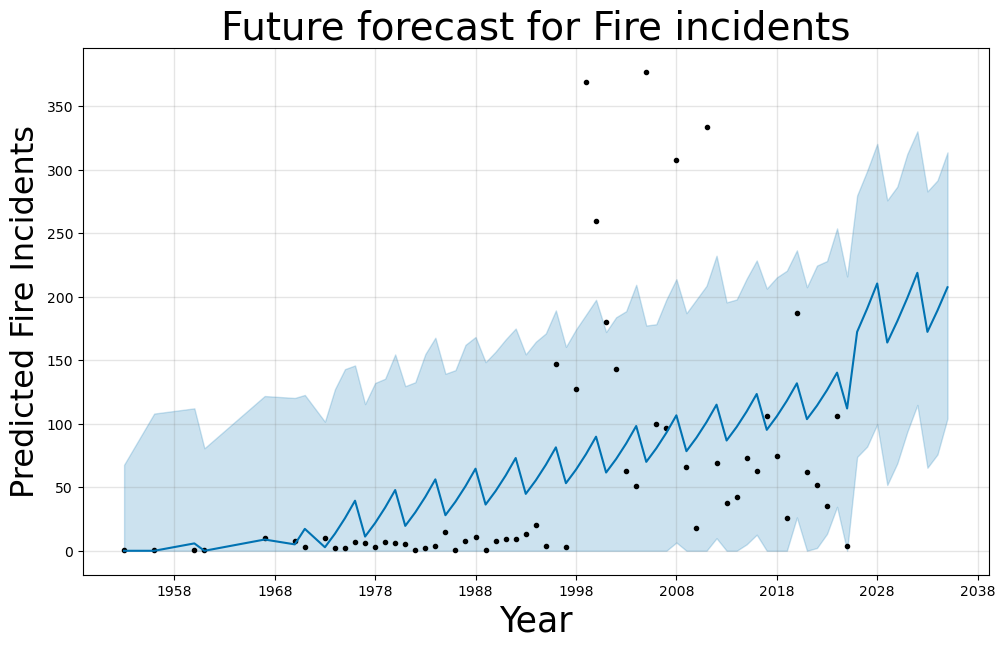

16:29:28 - cmdstanpy - INFO - Chain [1] start processing
16:29:28 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\bekim\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


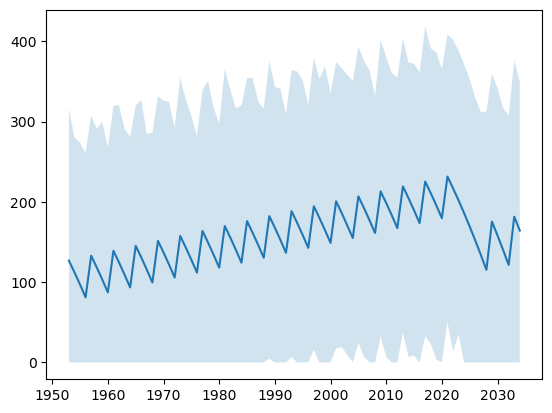

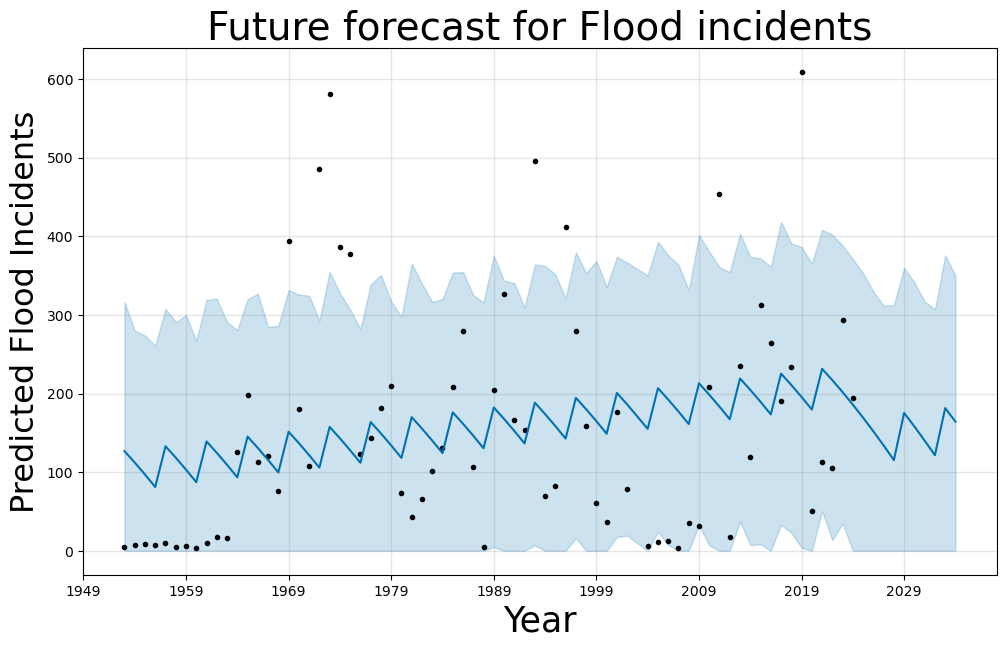

16:29:28 - cmdstanpy - INFO - Chain [1] start processing
16:29:29 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\bekim\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


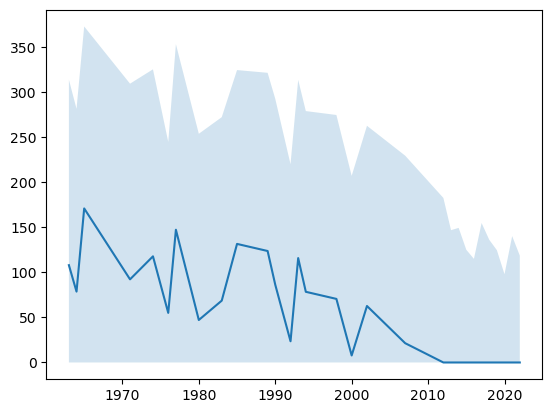

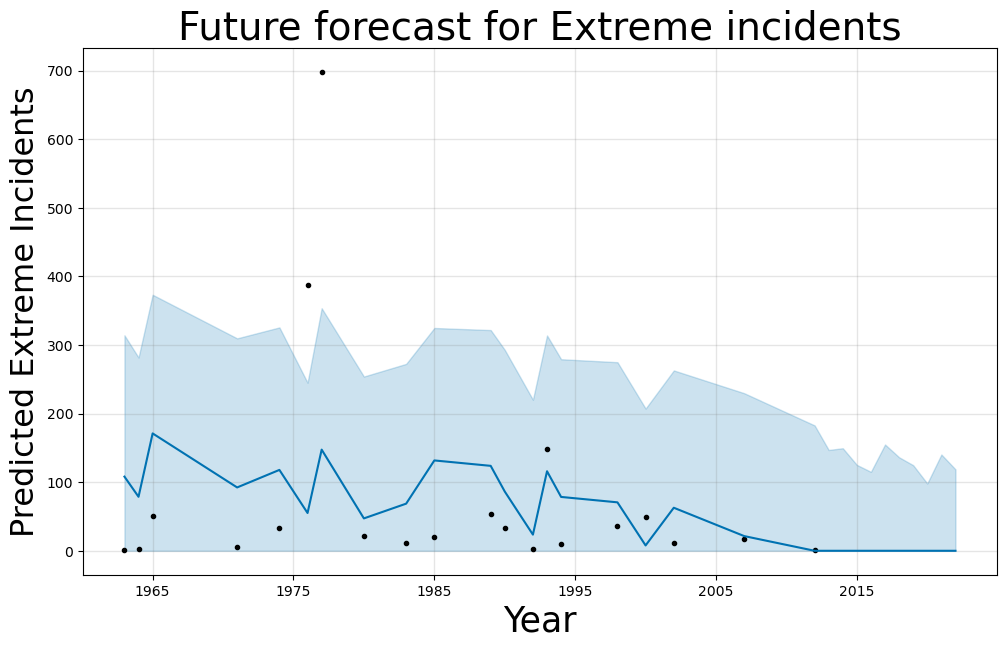

16:29:29 - cmdstanpy - INFO - Chain [1] start processing
16:29:29 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\bekim\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


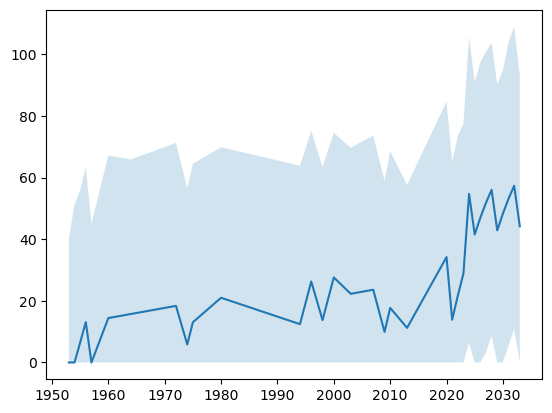

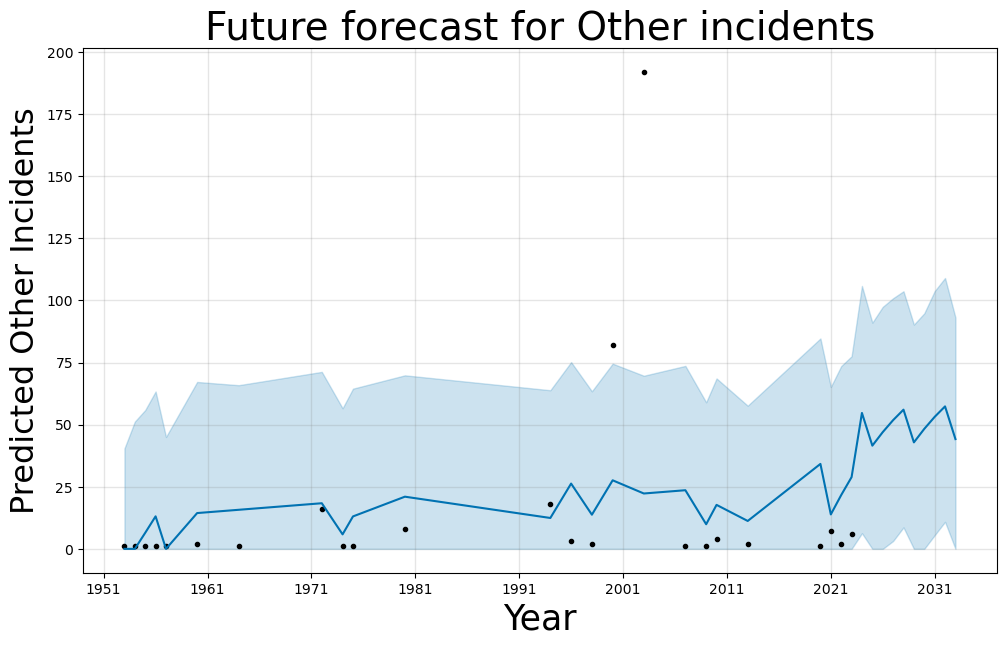

In [44]:
# loop through each disaster category
for cat in cat_map.keys():
    # Filter data for a specific category
    cat_dis = dis[dis['cat'] == cat]
    cat_fc = cat_dis.groupby('year').size().reset_index(name='y')
    cat_fc.rename(columns={'year': 'ds'}, inplace=True)
    cat_fc['ds'] = pd.to_datetime(cat_fc['ds'], format='%Y')

    # Initializing the prophet model  
    mod = Prophet(yearly_seasonality=True)
    mod.fit(cat_fc)

    # Create a future dataframe with the prediction 
    fut = mod.make_future_dataframe(periods=10, freq='Y')
    fc = mod.predict(fut)

    # used to make sure graphs do not go below 0 
    fc['yhat'] = fc['yhat'].clip(lower=0)
    fc['yhat_lower'] = fc['yhat_lower'].clip(lower=0)
    fc['yhat_upper'] = fc['yhat_upper'].clip(lower=0)

    # get forecasted value for 2035 
    pred_2035 = fc[fc['ds'].dt.year == 2035]

    # plot forecast line with prophets conf int
    plt.plot(fc['ds'], fc['yhat'], label='Forecast')
    plt.fill_between(fc['ds'], fc['yhat_lower'], fc['yhat_upper'], alpha=0.2)

    # plotting the chart 
    fig = mod.plot(fc)
    plt.title(f'Future forecast for {cat} incidents', fontsize=28)
    plt.xlabel('Year', fontsize=25)
    plt.ylabel(f'Predicted {cat} Incidents', fontsize=23)
    plt.show()

In [45]:
# look at each disaster category and predict how many disasters will happen 
for cat in cat_map.keys():
    print(f"\nProcessing category: {cat}")
    
    # Filter category data
    cat_dis = dis[dis['cat'] == cat]
    
    # Group by year, count events
    cat_fc = cat_dis.groupby('year').size().reset_index(name='y')
    
    cat_fc.rename(columns={'year': 'ds'}, inplace=True)
    cat_fc['ds'] = pd.to_datetime(cat_fc['ds'], format='%Y')
    
    if cat_fc.empty:
        print(f"No data found for category {cat}. Skip")
        continue
    
    last_yr = cat_fc['ds'].dt.year.max()
    print(f"Last year in data for {cat}: {last_yr}")
    
    periods = (2035 - last_yr) + 1
    
    if periods <= 0:
        print(f"{cat} already includes 2035 or beyond. Skip")
        continue
    
    # Train Prophet model
    mod = Prophet(yearly_seasonality=True)
    mod.fit(cat_fc)
    
    # Predict future years up to 2035
    fut = mod.make_future_dataframe(periods=periods, freq='YE')
    fc = mod.predict(fut)

    # Any negative values will be 0 
    fc['yhat'] = fc['yhat'].clip(lower=0)
    fc['yhat_lower'] = fc['yhat_lower'].clip(lower=0)
    fc['yhat_upper'] = fc['yhat_upper'].clip(lower=0)
    
    # Get forecasted value for 2035
    pred_2035 = fc[fc['ds'].dt.year == 2035]
    
    if pred_2035.empty:
        print(f"No forecast found for 2035 in category {cat}. Check periods and freq.")
        continue
    
    pred_2035 = pred_2035['yhat'].values[0]

    # Making sure predictions do not go below 0 
    pred_2035 = max(pred_2035, 0)
    
    # Calculate the 15-year average before the last year
    start = last_yr - 15
    
    win = cat_fc[
        (cat_fc['ds'].dt.year > start) & 
        (cat_fc['ds'].dt.year <= last_yr)
    ]
    
    if win.empty:
        print(f"No data in the last 15 years for {cat}. Skipping percentage calculation.")
        continue
    
    in_mean = win['y'].mean()
    print(f"15-year average incidents (from {start + 1} to {last_yr}): {in_mean:.2f}")
    
    if in_mean == 0:
        print(f"15-year average is zero for {cat}. Percentage not able to calculate.")
        continue
    
    #  Percentage cannot go below -100 percent 
    if pred_2035 == 0:
        pct = -100
    else:
        pct = ((pred_2035 - in_mean) / in_mean) * 100
    
    print(f"{cat}: {pct:.2f}% change by 2035 compared to the previous 15-year average.")


16:29:30 - cmdstanpy - INFO - Chain [1] start processing
16:29:30 - cmdstanpy - INFO - Chain [1] done processing



Processing category: Storm
Last year in data for Storm: 2024


16:29:30 - cmdstanpy - INFO - Chain [1] start processing
16:29:30 - cmdstanpy - INFO - Chain [1] done processing


15-year average incidents (from 2010 to 2024): 1110.87
Storm: 128.37% change by 2035 compared to the previous 15-year average.

Processing category: Geo
Last year in data for Geo: 2024
15-year average incidents (from 2010 to 2024): 17.09
Geo: 25.36% change by 2035 compared to the previous 15-year average.

Processing category: Fire
Last year in data for Fire: 2025


16:29:30 - cmdstanpy - INFO - Chain [1] start processing
16:29:30 - cmdstanpy - INFO - Chain [1] done processing
16:29:31 - cmdstanpy - INFO - Chain [1] start processing
16:29:31 - cmdstanpy - INFO - Chain [1] done processing


15-year average incidents (from 2011 to 2025): 84.80
Fire: 167.97% change by 2035 compared to the previous 15-year average.

Processing category: Flood
Last year in data for Flood: 2024


16:29:31 - cmdstanpy - INFO - Chain [1] start processing
16:29:31 - cmdstanpy - INFO - Chain [1] done processing


15-year average incidents (from 2010 to 2024): 226.67
Flood: -43.68% change by 2035 compared to the previous 15-year average.

Processing category: Extreme
Last year in data for Extreme: 2012
15-year average incidents (from 1998 to 2012): 22.80
Extreme: -100.00% change by 2035 compared to the previous 15-year average.

Processing category: Other
Last year in data for Other: 2023


16:29:31 - cmdstanpy - INFO - Chain [1] start processing
16:29:31 - cmdstanpy - INFO - Chain [1] done processing


15-year average incidents (from 2009 to 2023): 3.29
Other: 1685.45% change by 2035 compared to the previous 15-year average.
